In [1]:
import datetime
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ndays = 14
sensor_id = 63

In [3]:
data = pd.DataFrame()
ldate = datetime.date.today() - datetime.timedelta(1)
for x in range(ndays):
    dt = str(ldate - datetime.timedelta(x))
    url = "http://archive.luftdaten.info/{dt}/{dt}_ppd42ns_sensor_{sensor_id}.csv".format(dt=dt, sensor_id=sensor_id)
    print(url)
    r = requests.get(url)
    data = data.append(pd.read_csv(StringIO(r.text), delimiter=';'))

http://archive.luftdaten.info/2016-01-13/2016-01-13_ppd42ns_sensor_63.csv
http://archive.luftdaten.info/2016-01-12/2016-01-12_ppd42ns_sensor_63.csv
http://archive.luftdaten.info/2016-01-11/2016-01-11_ppd42ns_sensor_63.csv
http://archive.luftdaten.info/2016-01-10/2016-01-10_ppd42ns_sensor_63.csv
http://archive.luftdaten.info/2016-01-09/2016-01-09_ppd42ns_sensor_63.csv
http://archive.luftdaten.info/2016-01-08/2016-01-08_ppd42ns_sensor_63.csv
http://archive.luftdaten.info/2016-01-07/2016-01-07_ppd42ns_sensor_63.csv
http://archive.luftdaten.info/2016-01-06/2016-01-06_ppd42ns_sensor_63.csv
http://archive.luftdaten.info/2016-01-05/2016-01-05_ppd42ns_sensor_63.csv
http://archive.luftdaten.info/2016-01-04/2016-01-04_ppd42ns_sensor_63.csv
http://archive.luftdaten.info/2016-01-03/2016-01-03_ppd42ns_sensor_63.csv
http://archive.luftdaten.info/2016-01-02/2016-01-02_ppd42ns_sensor_63.csv
http://archive.luftdaten.info/2016-01-01/2016-01-01_ppd42ns_sensor_63.csv
http://archive.luftdaten.info/2015-12-

In [4]:
data[:3]

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,63,PPD42NS,31,48.777,9.235,2016-01-13T00:00:11.527753+00:00,252.53,145775,0.49,88.96,51023,0.17
1,63,PPD42NS,31,48.777,9.235,2016-01-13T00:00:41.965774+00:00,818.88,475051,1.58,126.37,72669,0.24
2,63,PPD42NS,31,48.777,9.235,2016-01-13T00:01:13.491648+00:00,1010.87,586474,1.95,70.84,40548,0.14


In [5]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [6]:
data['dt'] = data.apply(lambda row: datetime.datetime.strptime(row.timestamp[:-6], "%Y-%m-%dT%H:%M:%S.%f"),axis=1)

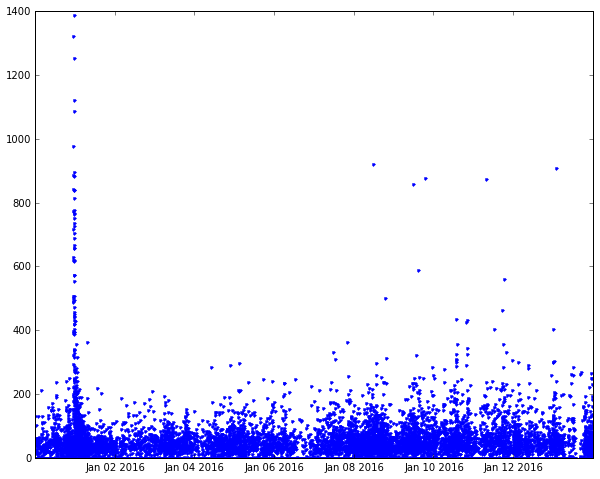

In [7]:
plt.plot(data.dt, data.P2, '.')

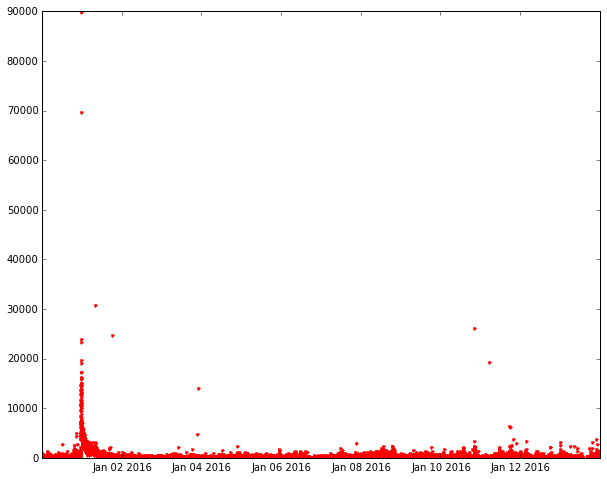

In [8]:
plt.plot(data.dt, data.P1, 'r.')